**Preprocessing data**

Import libraries and data set

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (8,5)

data = pd.read_csv("/content/Official_Credit-risk-model.csv") 

In [ ]:
data

,income,purpose,age,collateral,education,debt_to_income,number_credit,target
0,1,0,0,3,0,1,0,0
1,1,1,2,1,0,1,1,0
2,0,3,0,0,0,2,0,0
3,1,2,2,1,1,0,1,0
4,1,0,0,2,2,0,1,0
...,...,...,...,...,...,...,...,...
359,3,5,2,3,1,0,2,1
360,0,0,1,0,1,1,2,0
361,2,4,2,1,3,3,2,1
362,3,4,0,2,3,3,2,1


Correlation matrix

In [ ]:
matrix = data.corr()

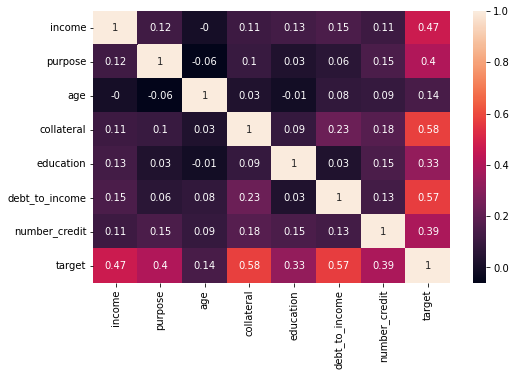

In [ ]:
matrix = data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

Descriptive statistics

In [ ]:
from copy import deepcopy
data_2 = deepcopy(data) 

In [ ]:
categorical_features = ['income', 'purpose', 'age', 'collateral', 'education', 'debt_to_income', 'number_credit']

In [ ]:
for col in categorical_features:
    data_2[col] = data_2[col].astype('object')

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          364 non-null    object
 1   purpose         364 non-null    object
 2   age             364 non-null    object
 3   collateral      364 non-null    object
 4   education       364 non-null    object
 5   debt_to_income  364 non-null    object
 6   number_credit   364 non-null    object
 7   target          364 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 22.9+ KB


In [ ]:
count_target= data_2['target'].value_counts()
count_target

0    202
1    162
Name: target, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


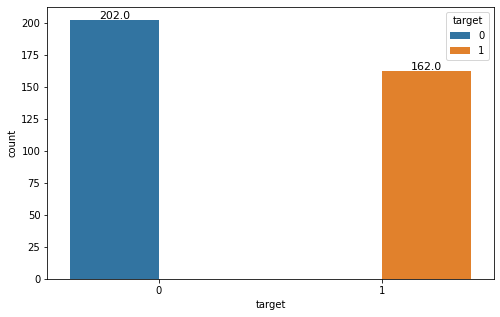

In [ ]:
ax = sns.countplot(data=data_2, x='target', hue='target')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [ ]:
# plt.figure(fig)

In [ ]:
data_2[categorical_features].describe()

,income,purpose,age,collateral,education,debt_to_income,number_credit
count,364,364,364,364,364,364,364
unique,4,6,3,4,4,4,3
top,0,0,2,0,0,0,1
freq,98,70,127,119,100,118,131


Describe: (time unit in months)

income: 0(low - under 6 mil); 1(medium from 6 - 15 mil); 2(high from 15 - 50 mil); 3(very high above 50 mil)

purpose: 0(travel); 1(furniture); 2(car); 3(business); 4(education); 5(real estate)

age: 0(18-25); 1(25-40); 2(>40)

collateral: 0(no collateral); 1(part of collateral); 2(enough but relatives' ownership); 3(enough and borrower's ownership)

education: 0(not graduated); 1(graduated); 2(university); 3(after university)

debt_percent_income: 0(>50%); 1(25-50%); 2(10-25%); 3(<10%)

number_credit: 0(1); 1(1-5); 2(>5)

target: 0(unable to repay); 1(can pay on time)

Check missing values

In [ ]:
data_2.isnull().sum()

income            0
purpose           0
age               0
collateral        0
education         0
debt_to_income    0
number_credit     0
target            0
dtype: int64

Visualize data

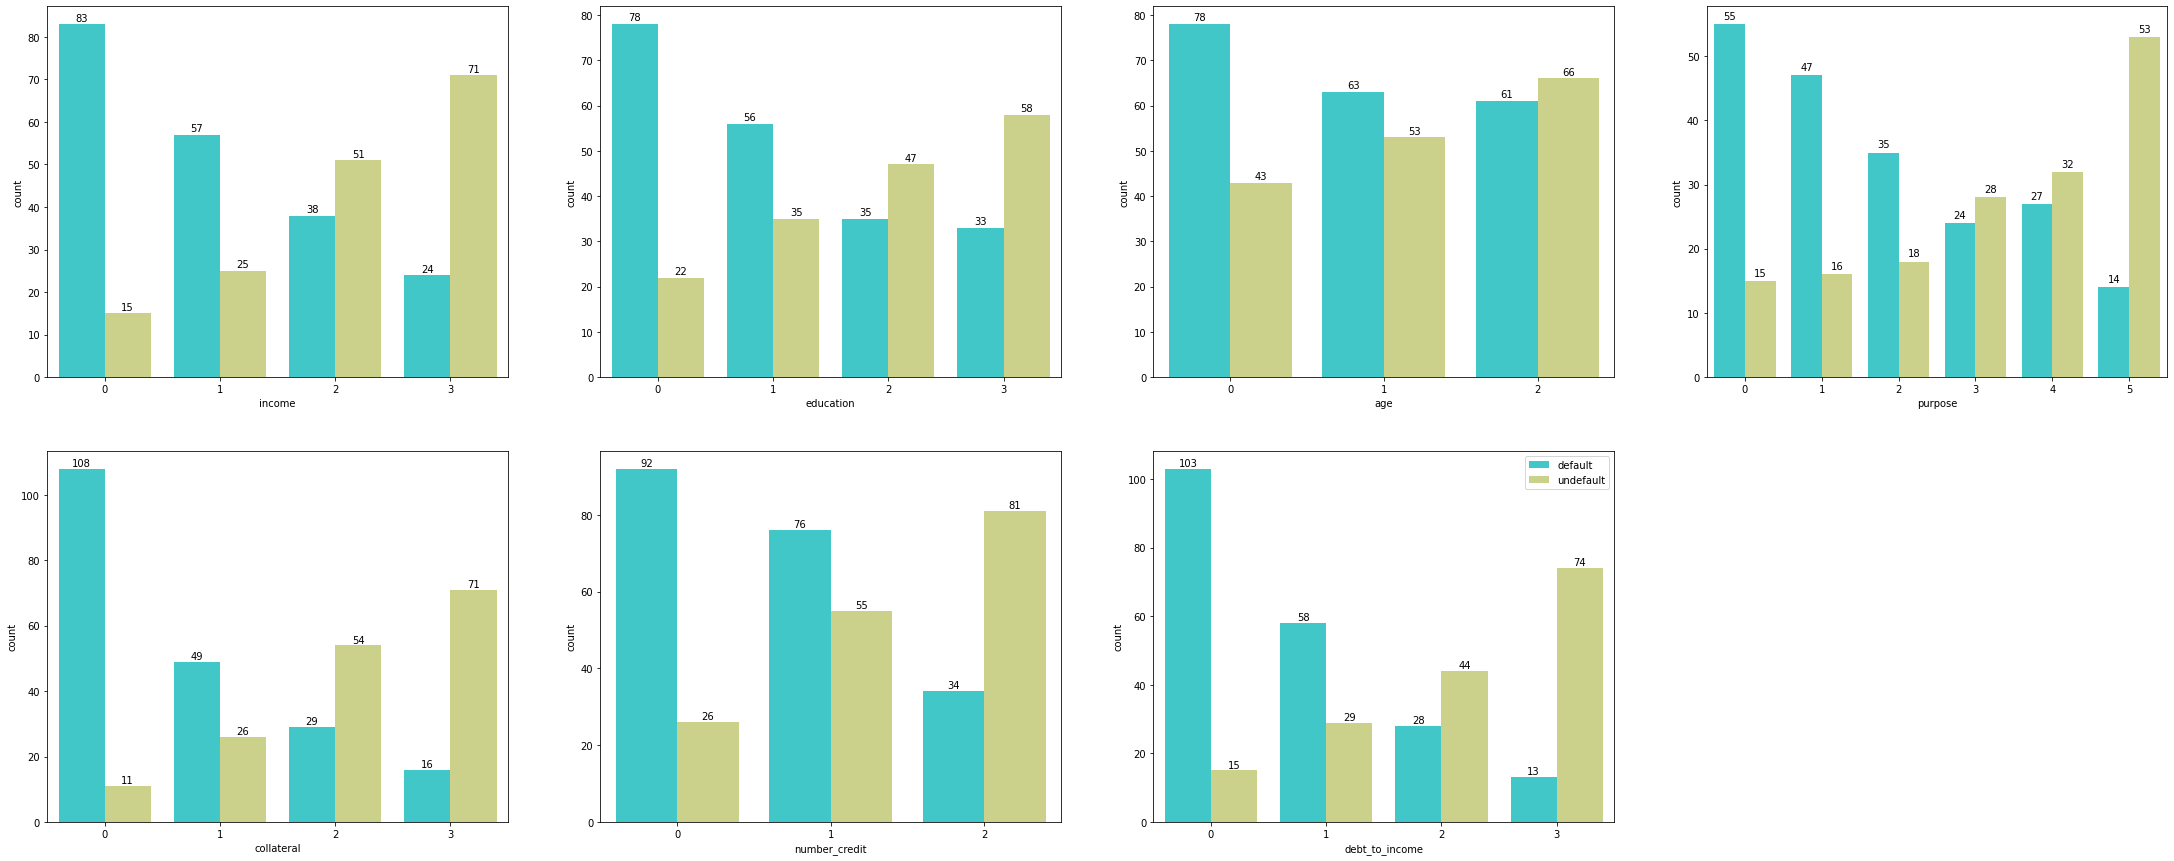

In [ ]:
plt.figure(figsize=(38,15))
def count(categorical_features):
  x=1
  for i in categorical_features:
    plt.subplot(2,4,x)
    ax = sns.countplot(x=i,data=data_2, palette='rainbow',hue='target')
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
    plt.legend([],[], frameon=False)
    x+=1
  plt.legend(['default', 'undefault'])
  plt.savefig('Data visualization.png')
  

count(['income', 'education', 'age', 'purpose', 'collateral', 'number_credit', 'debt_to_income'])


Create ROC-AUC function

In [ ]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

**Build model**

In [ ]:
# Import libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
target = data_2['target']
del data_2['target']
data_2['ability_to_repay'] = target

data_2

,income,purpose,age,collateral,education,debt_to_income,number_credit,ability_to_repay
0,1,0,0,3,0,1,0,0
1,1,1,2,1,0,1,1,0
2,0,3,0,0,0,2,0,0
3,1,2,2,1,1,0,1,0
4,1,0,0,2,2,0,1,0
...,...,...,...,...,...,...,...,...
359,3,5,2,3,1,0,2,1
360,0,0,1,0,1,1,2,0
361,2,4,2,1,3,3,2,1
362,3,4,0,2,3,3,2,1


In [ ]:
target = ['ability_to_repay']
features = list(set(list(data_2.columns)) - set(target))

In [ ]:
print('Target: ', target)
print('Features: ', features)

Target:  ['ability_to_repay']
Features:  ['income', 'education', 'age', 'collateral', 'number_credit', 'debt_to_income', 'purpose']


Split train-test sets

In [ ]:
X = data_2[features].values
y = data_2[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[21  3]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.81      1.00      0.90        13

    accuracy                           0.92        37
   macro avg       0.91      0.94      0.91        37
weighted avg       0.93      0.92      0.92        37

Decision Tree accuracy:  0.918918918918919


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


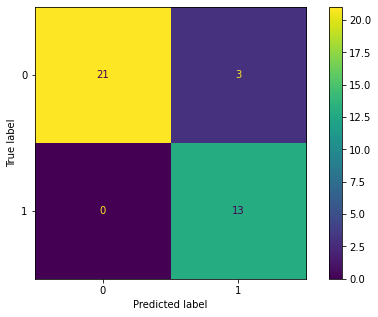

In [ ]:
# Confusion matrix

plot_confusion_matrix(DT_classifier, X_test, y_test)  
plt.show()

In [ ]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report

,Ground Truth,Prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


Feature importance

In [ ]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'Feature Names': data_2.columns[0:len(data_2.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,Feature Names,Decision Tree Feature Importance
3,collateral,0.312200
5,debt_to_income,0.246473
6,number_credit,0.169259
0,income,0.167228
4,education,0.057812
1,purpose,0.047028
2,age,0.000000


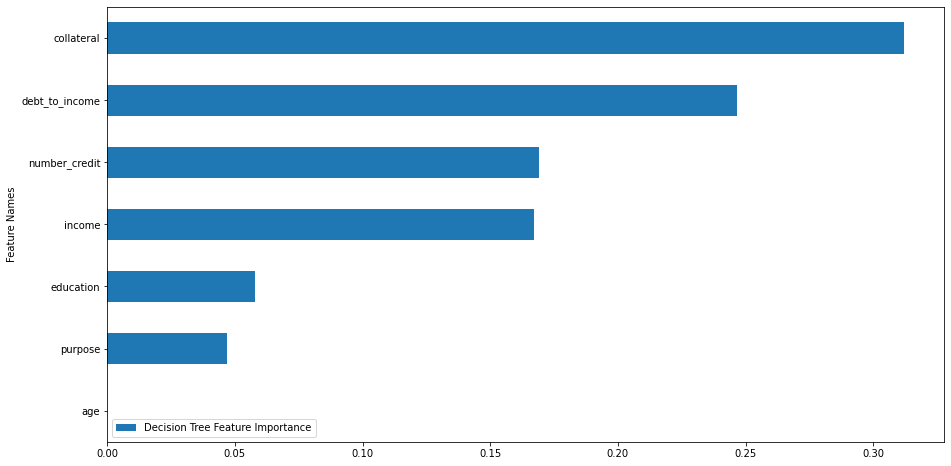

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="Feature Names", y=["Decision Tree Feature Importance"], kind="barh")

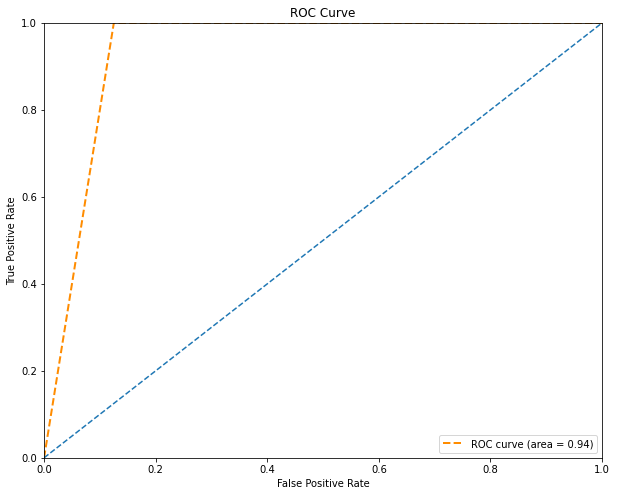

In [ ]:
# ROC curve

y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]

y_pred_prob_test

fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [ ]:
# Plot Tree

X_plot_tree = data_2[features]

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

dt_feature_names = X_plot_tree.columns.values

X_0: income
X_1: education
X_2: age
X_3: collateral
X_4: number_credit
X_5: debt_to_income
X_6: purpose


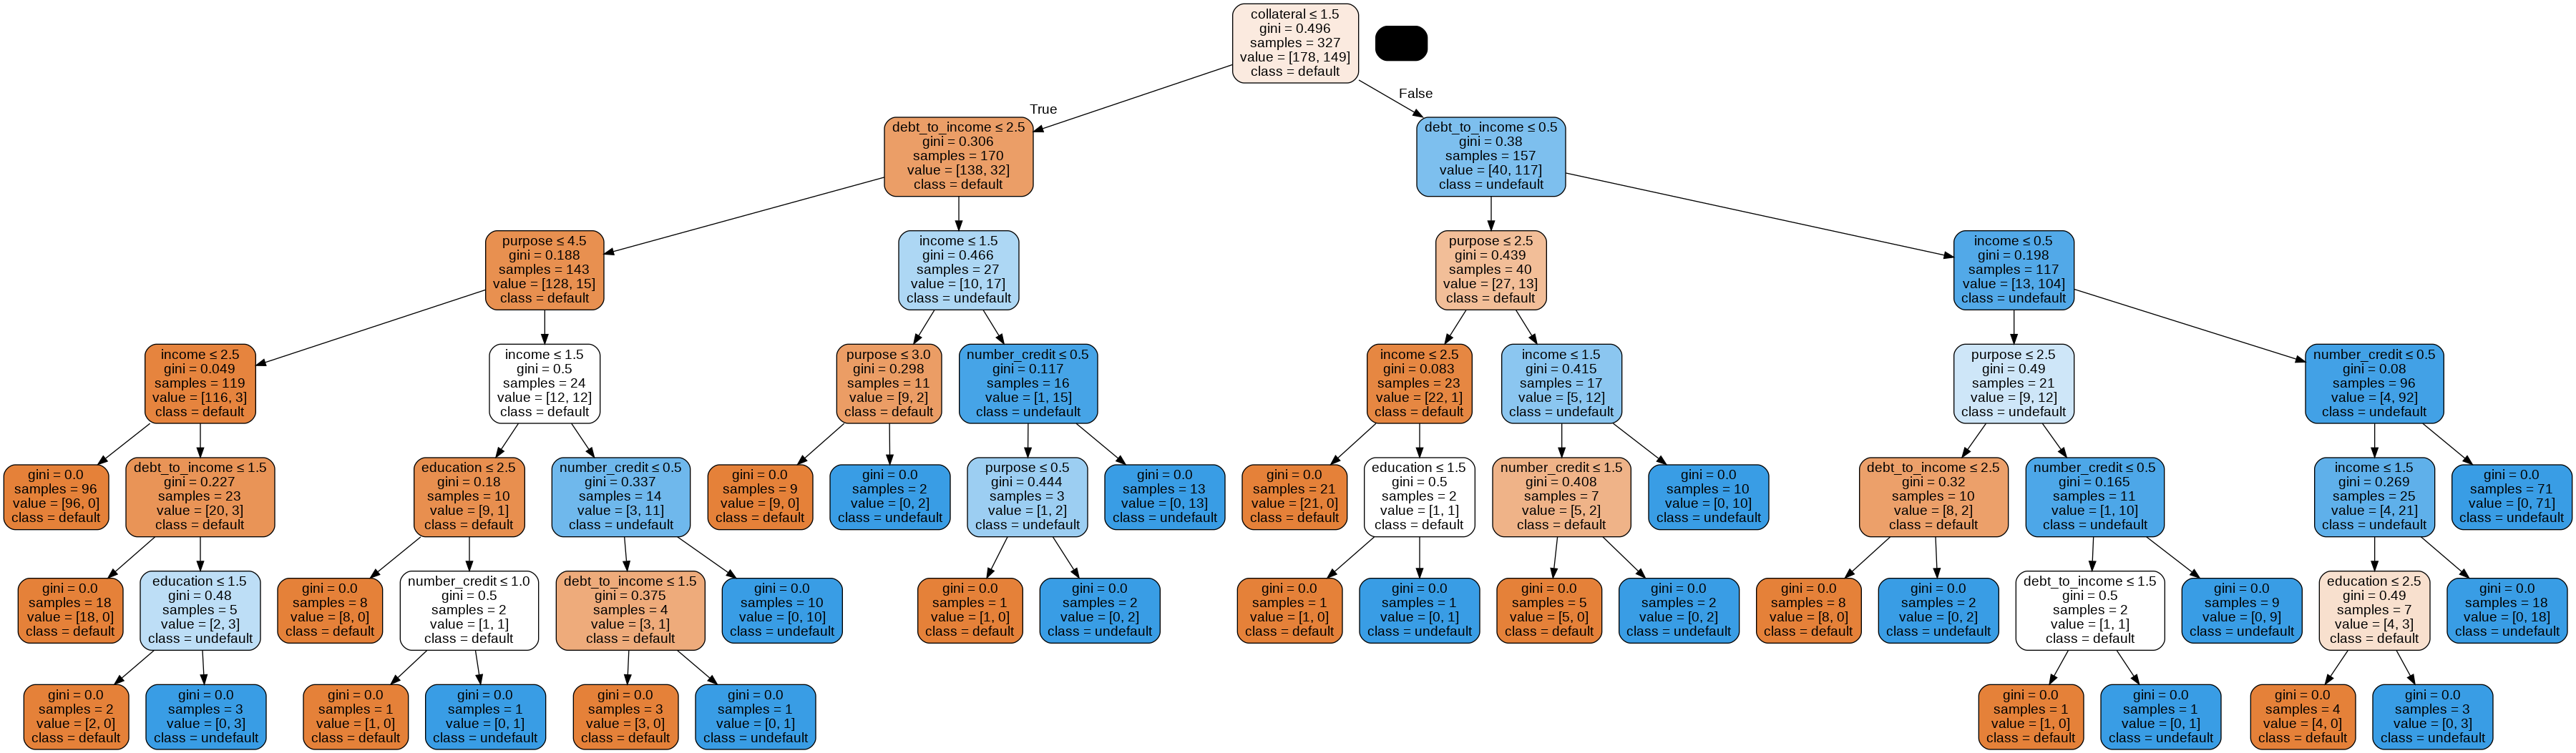

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dt_target_names=['default', 'undefault']
dot_data = StringIO()
export_graphviz(DT_classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=dt_feature_names, class_names=dt_target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Prediction
y_pred_lr=lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


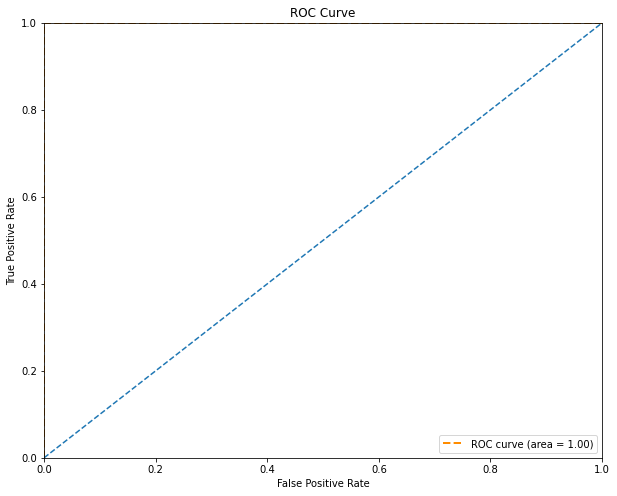

In [ ]:
# ROC curve

y_pred_prob_test = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [ ]:
# Feature importance

importance_lr = lr.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'Feature Names': data.columns[0:len(data.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,Feature Names,Logistic Regression Feature Importance
3,collateral,2.242395
5,debt_to_income,2.177213
0,income,1.690824
1,purpose,1.375511
4,education,1.204508
6,number_credit,1.175562
2,age,0.729748


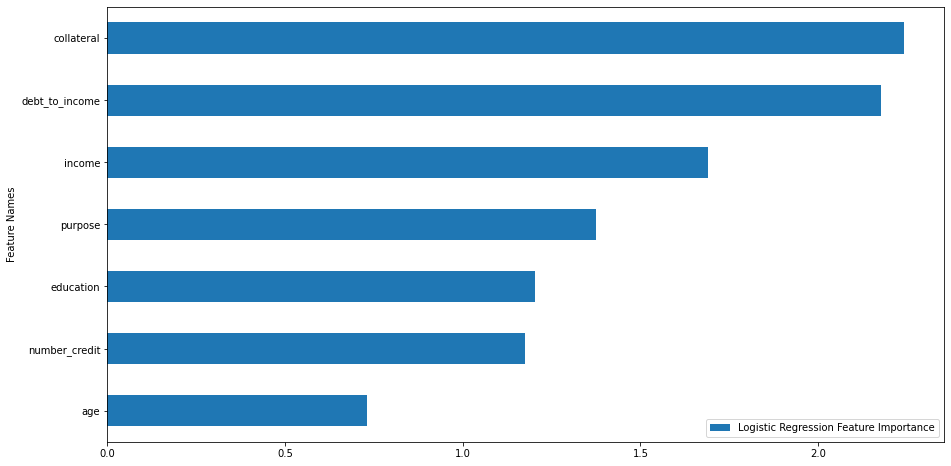

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="Feature Names", y=["Logistic Regression Feature Importance"], kind="barh")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


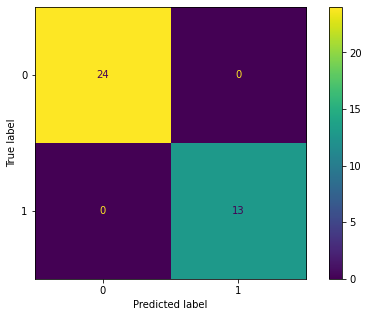

In [ ]:
# Confusion matrix

plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [ ]:
# Classification report

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        13

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

